In [1]:
 # Dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import in csv and name columns

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population
# MEDV - Median value of owner-occupied homes in $10000's

In [2]:
 # Name of the CSV file
file = '/Users/cnewe/desktop/classwork/mod20_final Project/final_project'
#Read CSV file in DataFrame
boston_data = pd.read_csv(file, encoding="ISO-8859-1")
#Check DataFrame
boston_data.head()

In [ ]:
# Keep town number for classification
# Lat and long is pretty similar
print(boston_data.keys())

In [5]:
#Rows x Columns
df_details.shape

(59010, 51)

In [6]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59010 entries, 0 to 59009
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     59010 non-null  int64  
 1   BEGIN_DAY           59010 non-null  int64  
 2   BEGIN_TIME          59010 non-null  int64  
 3   END_YEARMONTH       59010 non-null  int64  
 4   END_DAY             59010 non-null  int64  
 5   END_TIME            59010 non-null  int64  
 6   EPISODE_ID          59010 non-null  int64  
 7   EVENT_ID            59010 non-null  int64  
 8   STATE               59010 non-null  object 
 9   STATE_FIPS          59010 non-null  int64  
 10  YEAR                59010 non-null  int64  
 11  MONTH_NAME          59010 non-null  object 
 12  EVENT_TYPE          59010 non-null  object 
 13  CZ_TYPE             59010 non-null  object 
 14  CZ_FIPS             59010 non-null  int64  
 15  CZ_NAME             59010 non-null  object 
 16  WFO 

In [7]:
#Checking for duplicate rows

duplicate_rows_df = df_details[df_details.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 51)


In [8]:
#provide the count, mean, standard deviation, minimum and maximum values and the quantities of the data.
df_details.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,59010.0,...,49.0,1241.000000,1241.000000,157.000000,35722.000000,35722.000000,35722.000000,35722.000000,35722.000000,35722.000000
mean,200706.189561,13.985155,1241.643128,200706.189561,16.141349,1478.287460,6935.075682,39788.723945,31.878885,2007.0,...,1.0,2.947985,153.792103,108.936306,2.583394,2.643693,38.159862,-91.050765,38.159030,-91.042328
std,3.069982,9.039472,702.222593,3.069982,9.115030,605.806092,3340.246651,18926.649485,17.273970,0.0,...,0.0,4.071044,294.180993,91.516475,6.091724,6.222080,5.366017,10.627334,5.366066,10.625819
min,200701.000000,1.000000,0.000000,200701.000000,1.000000,0.000000,765.000000,3419.000000,1.000000,2007.0,...,1.0,0.010000,2.000000,1.000000,0.000000,0.000000,-14.300000,-170.600000,-14.300000,-170.600000
25%,200704.000000,6.000000,650.000000,200704.000000,8.000000,1100.000000,4160.500000,24055.250000,19.000000,2007.0,...,1.0,0.300000,30.000000,47.000000,0.000000,0.000000,34.380400,-98.420000,34.388375,-98.400000
50%,200706.000000,14.000000,1440.000000,200706.000000,16.000000,1600.000000,6627.500000,39452.500000,30.000000,2007.0,...,1.0,1.290000,50.000000,83.000000,1.000000,1.000000,38.540700,-91.810000,38.539950,-91.800000
75%,200708.000000,22.000000,1800.000000,200708.000000,24.000000,1905.000000,9749.750000,55105.750000,46.000000,2007.0,...,1.0,4.000000,150.000000,145.000000,3.000000,3.000000,42.100000,-82.998725,42.100000,-82.980000
max,200712.000000,31.000000,2359.000000,200712.000000,31.000000,2359.000000,77492.000000,467538.000000,99.000000,2007.0,...,1.0,32.460000,3872.000000,483.000000,520.000000,520.000000,64.513100,-64.700000,64.280600,-64.700000


<AxesSubplot:>

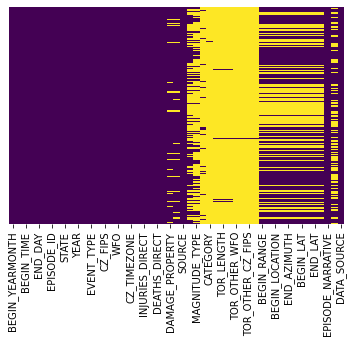

In [16]:
# Visually check for missing values

sn.heatmap(df_details.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
#function to find outliers in a column
#input: dataframe column
#output: an array of outlier values
def findoutliers(col):
    outliers = []
    Q1 = col.quantile(.25)
    Q3 = col.quantile(.75)
    IQR = Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in col:
        if out1>upper_limit or out1 < lower_limit:
            outliers.append(out1)
    
    return np.array(outliers)

In [13]:
#function to analysis a column of a dataframe
#input: Column of a Dataframe
#output: Outliers, Mean, Median, Missing Values, BoxPlot, DistributionPlot

def plotchart(col):
    fix, (ax1, ax2) = plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v', ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ', format(col.mean()))
    print('Median ', format(col.median()))
    print('Missing values', format(round(100*(col.isnull().sum()/len(col)),2)))

    plotchart(col)

count of outlier  0
Mean  13.985155058464667
Median  14.0
Missing values 0.0


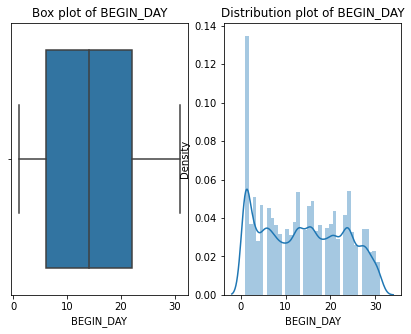

In [14]:
#Run basic analysis on BEGIN_DAY column
analysis_column(df_details.BEGIN_DAY)

<AxesSubplot:>

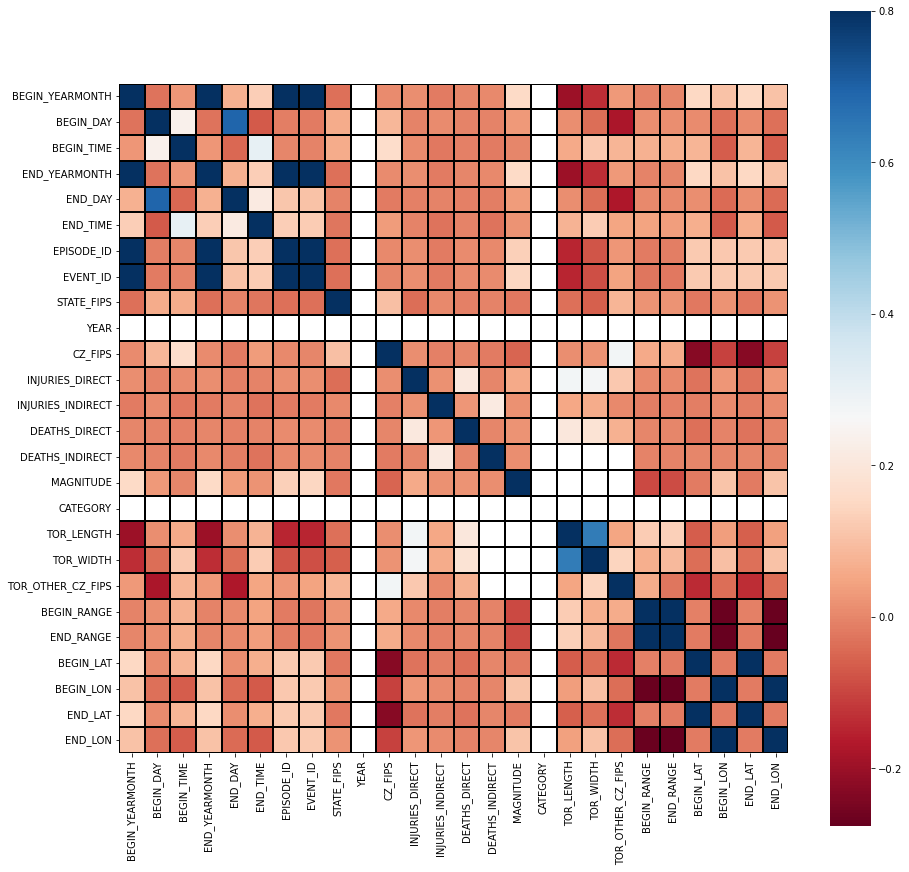

In [18]:
#heatmap of features
#positive correlation is represented by dark shades and negative correlation by lighter shades.

corr=df_details.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01, square=True, annot=False, cmap='RdBu', linecolor='black')